In [ ]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Get the dataset
dataset = pd.read_csv('/content/Position_Salaries.csv')

In [ ]:
#Get a glimpse of the Dataset
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
#Separating the independent and dependent features
#Dependent feature
y = np.asarray(dataset['Salary'].values.tolist()) 

# Independent Feature
X = np.asarray(dataset['Level'].values.tolist())

In [ ]:
#X = X.reshape(-1,1)
#y = y.reshape(-1,1)

In [ ]:
#Get the shapes of X and y
print("Shape of the X is ",X.shape)
print("Shape of the Y is",y.shape)

Shape of the X is  (10,)
Shape of the Y is (10,)


In [ ]:
def poly_features(features, X):
  data = pd.DataFrame(np.zeros((X.shape[0],features)))
  for i in range(1,features+1):
    data.iloc[:,i-1] = (X**i)
  X_poly = np.array(data.values.tolist())
  return X_poly

In [ ]:
# The method "split_data" splits the given dataset into trainset and testset
# This is similar to the method "train_test_split" from "sklearn.model_selection"
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                  #set the seed for reproducible results
    indices = np.random.permutation(len(X))       #shuffling the indices
    data_test_size = int(X.shape[0] * test_size)  #Get the test size

    #Separating the Independent and Dependent features into the Train and Test Set
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [ ]:
# The method pred_to_plot returns predictions on given values and helps in
# better visualization
def pred_to_plot(W_trained, X):
  prediction_values = list()
  for i in range(X.shape[0]):
    value = regressor.predict(W_trained,X[i])
    prediction_values.append(value)
  return prediction_values

In [ ]:
class polynomialRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=2):
    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization
#kfold
    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()
  


In [ ]:
# Independent Feature
#X = np.asarray(dataset['Level'].values.tolist())

In [ ]:
def polynomial_r_squared(x, y, degree):
    coefficients = np.polyfit(x, y, degree)
    p = np.poly1d(coefficients)
    yhat = p(x)
    ybar = np.sum(y) / len(y)
    ssreg = np.sum((yhat - ybar)**2)
    sstot = np.sum((y - ybar)**2)
    r_squared = ssreg / sstot
    return r_squared,coefficients,yhat,p
val_R2,c,yhat,p = polynomial_r_squared(X, y, 2)
val_R2

0.916208222144394

In [ ]:
#import pandas as pd

# Assuming the dataset is a pandas DataFrame
# Extract the column you want to convert to an array
column = dataset['Level']

# Convert the column to a pandas Series object, then to a NumPy array
X = column.to_numpy()
#X = array.reshape(-1,1)
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
X = poly_features(1,X)

In [ ]:
#Adding the feature X0 = 1, so we have the equation: y =  W0 + (W1 * X1) + (W2 * (X1**2))
#X = np.concatenate((X,np.ones((10,1))), axis = 1)

In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
#Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X,y)

In [ ]:
#declaring the "regressor" as an object of the class polynomialRegression
regressor = polynomialRegression()

In [ ]:
#Training 
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=200, alpha=0.00001)

In [ ]:
#Testing on the Test Dataset
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

#### Visualizing


In [ ]:
pred_plot = pred_to_plot(W_trained,X)

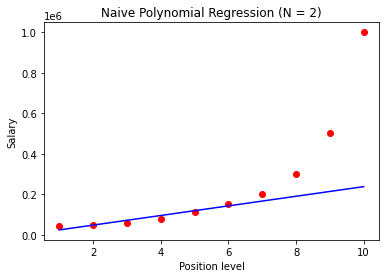

In [ ]:
plt.scatter(X[:,0], y, color = 'red')
plt.plot(X[:,0], pred_plot, color = 'blue')
plt.title('Naive Polynomial Regression (N = 2)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

We have got good results for $N=2$ but we can try for better performance by changing the value of $N$.

 Let us train the regressor for $N=4$.

### Polynomial Regression (N=4)

In [ ]:
# Independent Feature
X = np.asarray(dataset['Level'].values.tolist())

In [ ]:
# Constructing the polynomials of our Independent features 
X_poly = poly_features(3,X)

In [ ]:
#Adding the feature X0 = 1, so we have the equation: y =  W0 + (W1 * X1) + (W2 * (X1**2))
X_poly = np.concatenate((X_poly,np.ones((10,1))), axis = 1)

In [ ]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   2.,    4.,    8.,    1.],
       [   3.,    9.,   27.,    1.],
       [   4.,   16.,   64.,    1.],
       [   5.,   25.,  125.,    1.],
       [   6.,   36.,  216.,    1.],
       [   7.,   49.,  343.,    1.],
       [   8.,   64.,  512.,    1.],
       [   9.,   81.,  729.,    1.],
       [  10.,  100., 1000.,    1.]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
#Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X_poly,y)

In [ ]:
#declaring the "regressor" as an object of the class LinearRegression
regressor = polynomialRegression()

In [ ]:
#Training 
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=1500, alpha=1e-8)

In [ ]:
#Testing on the Test Dataset
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)
test_loss

[array([2.87999956e+12, 2.87989746e+12, 2.87789872e+12, 2.87999877e+12]),
 array([8.40499999e+16, 8.40499825e+16, 8.40496410e+16, 8.40499998e+16])]

In [ ]:
test_pred

[2400000.0, 410000000.0]

In [ ]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   2.,    4.,    8.,    1.],
       [   3.,    9.,   27.,    1.],
       [   4.,   16.,   64.,    1.],
       [   5.,   25.,  125.,    1.],
       [   6.,   36.,  216.,    1.],
       [   7.,   49.,  343.,    1.],
       [   8.,   64.,  512.,    1.],
       [   9.,   81.,  729.,    1.],
       [  10.,  100., 1000.,    1.]])

In [ ]:
pred_plot = pred_to_plot(W_trained,X_poly)

In [ ]:
pred_plot

[919.116549583209,
 7177.324559231079,
 24029.285793127805,
 56729.14947601295,
 110531.06483262606,
 190689.18108770667,
 302457.64746599447,
 451090.6131922288,
 641842.2274911493,
 879966.6395874956]

In [ ]:
val_R22 = polynomial_r_squared(X, y,degree = 3)
val_R22

(0.9812097727913338,
 array([   4120.04662005,  -48548.95104895,  180664.33566434,
        -121333.33333333]),
 array([ 14902.0979021 ,  78759.90675991,  94960.37296037,  88223.77622378,
         83270.3962704 , 104820.51282051, 177594.40559441, 326312.35431235,
        575694.63869464, 950461.53846154]),
 poly1d([   4120.04662005,  -48548.95104895,  180664.33566434,
        -121333.33333333]))

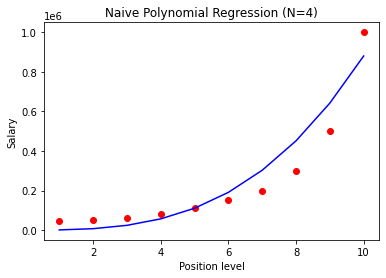

In [ ]:
plt.scatter(X_poly[:,0], y, color = 'red')
plt.plot(X_poly[:,0], pred_plot, color = 'blue')
plt.title('Naive Polynomial Regression (N=4)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Clearly, the regressor with $N=4$ performs better than the regressor with $N=2$. You can increase the value of $N$ and look for better performance but, be careful that you don't run into the problem of **Overfitting**.

As of now, our best regressor has $N=4$ and therefore, we will train the polynomial regression using sklearn only for $N=4$